In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread("C:/Users/athar/PycharmProjects/Celeb_image_Classification/dataset/ryan_reynolds/RR-1 (1).jpg")
img.shape

(204, 204, 3)

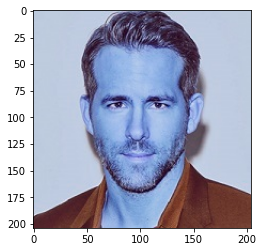

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(204, 204)

In [5]:
gray

array([[204, 206, 207, ..., 207, 207, 207],
       [206, 206, 207, ..., 208, 208, 208],
       [208, 207, 206, ..., 208, 208, 208],
       ...,
       [ 41,  42,  43, ...,  69,  70,  71],
       [ 41,  42,  43, ...,  70,  70,  71],
       [ 42,  42,  42, ...,  67,  67,  68]], dtype=uint8)

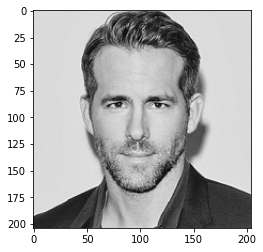

In [6]:
plt.imshow(gray, cmap = 'gray')

In [7]:
face_cascade = cv2.CascadeClassifier("C:/Users/athar/PycharmProjects/Celeb_image_Classification/Haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("C:/Users/athar/PycharmProjects/Celeb_image_Classification/Haarcascades/haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 40,  44, 115, 115]], dtype=int32)

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(40, 44, 115, 115)

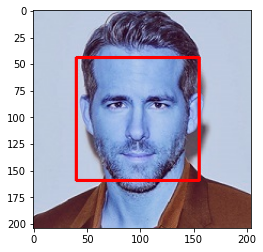

In [9]:
face_img = cv2.rectangle(img, (x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

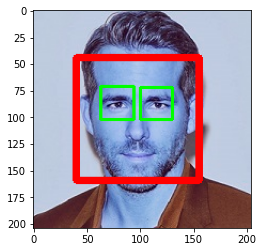

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),5)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray,1.005,10)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
        
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

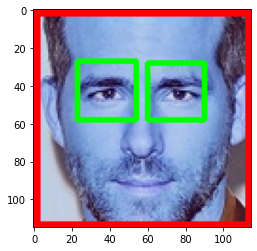

In [11]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [12]:
cropped_img = np.array(roi_color)
cropped_img.shape

(115, 115, 3)

In [13]:
path_to_data= "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [14]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [15]:
img_dirs

['./dataset/chris_evans',
 './dataset/chris_hemsworth',
 './dataset/dakota_johnson',
 './dataset/gal_gadot',
 './dataset/jennifer_aniston',
 './dataset/ryan_reynolds',
 './dataset/taylor_swift',
 './dataset/tom_cruise']

In [16]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [18]:
def get_cropped_img_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

In [19]:
cropped_image_dirs=[]
celeb_file_names_dict={}

for img_dir in img_dirs:
    count=1
    celeb_name = img_dir.split('/')[-1]
    
    celeb_file_names_dict[celeb_name] =[]
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_img_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celeb_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
            cropped_file_name = celeb_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celeb_file_names_dict[celeb_name].append(cropped_file_path)
            count+=1
                

In [20]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

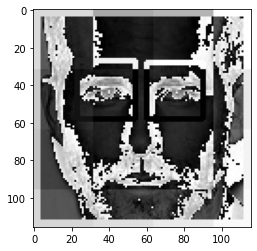

In [21]:
im_har=w2d(cropped_img,'db1',5)
plt.imshow(im_har,cmap='gray')

In [22]:
celeb_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celeb_name= img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celeb_file_names_dict[celeb_name] = file_list
celeb_file_names_dict

{'chris_evans': ['./dataset/cropped/chris_evans\\chris_evans1.png',
  './dataset/cropped/chris_evans\\chris_evans11.png',
  './dataset/cropped/chris_evans\\chris_evans12.png',
  './dataset/cropped/chris_evans\\chris_evans14.png',
  './dataset/cropped/chris_evans\\chris_evans15.png',
  './dataset/cropped/chris_evans\\chris_evans16.png',
  './dataset/cropped/chris_evans\\chris_evans17.png',
  './dataset/cropped/chris_evans\\chris_evans18.png',
  './dataset/cropped/chris_evans\\chris_evans19.png',
  './dataset/cropped/chris_evans\\chris_evans3.png',
  './dataset/cropped/chris_evans\\chris_evans4.png',
  './dataset/cropped/chris_evans\\chris_evans5.png',
  './dataset/cropped/chris_evans\\chris_evans6.png',
  './dataset/cropped/chris_evans\\chris_evans8.png',
  './dataset/cropped/chris_evans\\chris_evans9.png'],
 'chris_hemsworth': ['./dataset/cropped/chris_hemsworth\\chris_hemsworth1.png',
  './dataset/cropped/chris_hemsworth\\chris_hemsworth10.png',
  './dataset/cropped/chris_hemsworth\\c

In [23]:
class_dict={}
count=0
for celeb_name in celeb_file_names_dict.keys():
    class_dict[celeb_name] = count
    count = count+1
class_dict

{'chris_evans': 0,
 'chris_hemsworth': 1,
 'dakota_johnson': 2,
 'gal_gadot': 3,
 'jennifer_aniston': 4,
 'ryan_reynolds': 5,
 'taylor_swift': 6,
 'tom_cruise': 7}

In [24]:
X=[]
y=[]

for celeb_name, training_files in celeb_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(img,'db1',5)
        scaled_img_har=cv2.resize(img_har, (32,32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1), scaled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celeb_name])

In [25]:
len(X)

210

In [26]:
len(y)

210

In [27]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(210, 4096)

In [28]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [29]:
X_train,X_test, y_train,y_test = train_test_split(X,y, random_state=0)

In [30]:
pipe = Pipeline([('Scaler', StandardScaler()), ('svc', SVC(kernel='rbf',C=10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7169811320754716

In [31]:
len(X_test)

53

In [32]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       1.00      0.40      0.57         5
           2       0.75      0.50      0.60         6
           3       0.57      0.50      0.53         8
           4       1.00      1.00      1.00         7
           5       1.00      0.91      0.95        11
           6       0.33      0.71      0.45         7
           7       0.80      0.80      0.80         5

    accuracy                           0.72        53
   macro avg       0.81      0.70      0.72        53
weighted avg       0.80      0.72      0.73        53



In [33]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [34]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}


In [35]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.770968,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.510282,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.746169,{'logisticregression__C': 1}


In [36]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [37]:
best_estimators['svm'].score(X_test,y_test)

0.8301886792452831

In [38]:
best_estimators['random_forest'].score(X_test,y_test)

0.4339622641509434

In [39]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8490566037735849

In [40]:
best_clf = best_estimators['svm']

In [41]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 3,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  4,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  4,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  7,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 11,  0,  0],
       [ 0,  0,  1,  1,  0,  0,  5,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  3]], dtype=int64)

Text(69.0, 0.5, 'Truth')

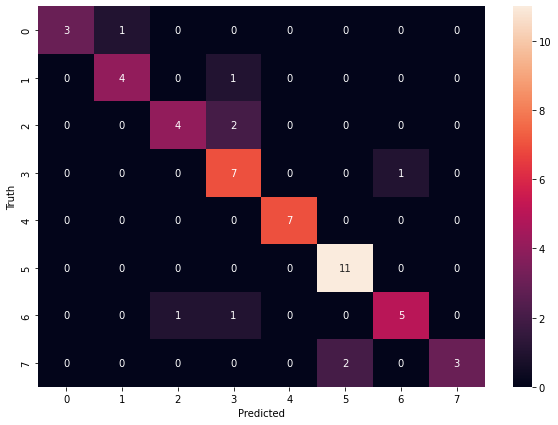

In [42]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
class_dict

{'chris_evans': 0,
 'chris_hemsworth': 1,
 'dakota_johnson': 2,
 'gal_gadot': 3,
 'jennifer_aniston': 4,
 'ryan_reynolds': 5,
 'taylor_swift': 6,
 'tom_cruise': 7}

In [44]:
!pip install joblib
import joblib

You should consider upgrading via the 'C:\Users\athar\anaconda3\python.exe -m pip install --upgrade pip' command.


In [45]:
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [46]:
import json
with open('class_dictionary.json','w') as f:
    f.write(json.dumps(class_dict))